In [261]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import utils

### Import Dataset

In [263]:
df = pd.read_csv("housing.csv")
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
215,0.19802,0.0,10.59,0,0.489,6.182,42.4,3.9454,4,277,18.6,393.63,9.47,25.0
259,0.65665,20.0,3.97,0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.90,30.1
392,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666,20.2,396.90,25.68,9.7
341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,394.74,5.49,32.7
168,2.30040,0.0,19.58,0,0.605,6.319,96.1,2.1000,5,403,14.7,297.09,11.10,23.8


### Data Cleaning and preparation

In [264]:
df = df.rename(columns = {"CRIM": "Crime Rate Town",
                          "ZN": "Residential Land > 25000 Sq.Ft",
                          "INDUS": "Non-Retail Acres Town",
                          "CHAS": "Charles River",
                          "NOX": "NO (Per 10 Million)",
                          "RM": "Average Rooms",
                          "AGE": "House Age",
                          "DIS": "Distance Boston Centers",
                          "RAD": "Accessability Highways",
                          "TAX": "Tax Per $10000",
                          "PTRATIO": "Pupil-Teacher Ratio",
                          "B": "Proportion of Blacks",
                          "LSTAT": "% Lower Status",
                          "MEDV": "Median values in $1000's"})

In [265]:
df.head()

,Crime Rate Town,Residential Land > 25000 Sq.Ft,Non-Retail Acres Town,Charles River,NO (Per 10 Million),Average Rooms,House Age,Distance Boston Centers,Accessability Highways,Tax Per $10000,Pupil-Teacher Ratio,Proportion of Blacks,% Lower Status,Median values in $1000's
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Create Feature and Terget Arrays

In [266]:
# [:5] means all rows and 5th column
X_rooms = df[["Average Rooms"]]
y = df["Median values in $1000's"]

**Check Data Types**

In [267]:
type(X_rooms), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

### Plotting Housing Value vs. Number of Rooms

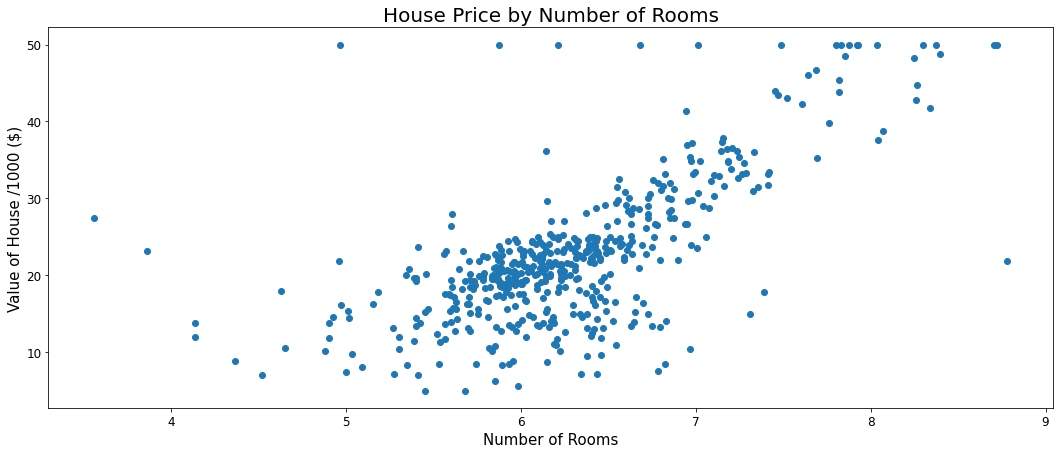

In [268]:
plt.figure(figsize = (18, 7))
plt.scatter(X_rooms, y)
plt.title("House Price by Number of Rooms", size = 20)
plt.ylabel("Value of House /1000 ($)", size = 15)
plt.xlabel("Number of Rooms", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

### Fitting a Regression Model

In [269]:
# Linear Regression object
lr = LinearRegression()

In [270]:
# Fit Model
lr.fit(X_rooms, y)

LinearRegression()

In [271]:
# Predict House Price through Number of Rooms
yhat = lr.predict(X_rooms)

In [272]:
pd.DataFrame({"Actual Price": y, "Predicted Price": yhat})[0:5]

,Actual Price,Predicted Price
0,24.0,25.175746
1,21.6,23.774021
2,34.7,30.728032
3,33.4,29.025938
4,36.2,30.382152


In [273]:
r_squared = r2_score(y, yhat)
r_squared

0.48352545599133423

### Plotting Regression Line

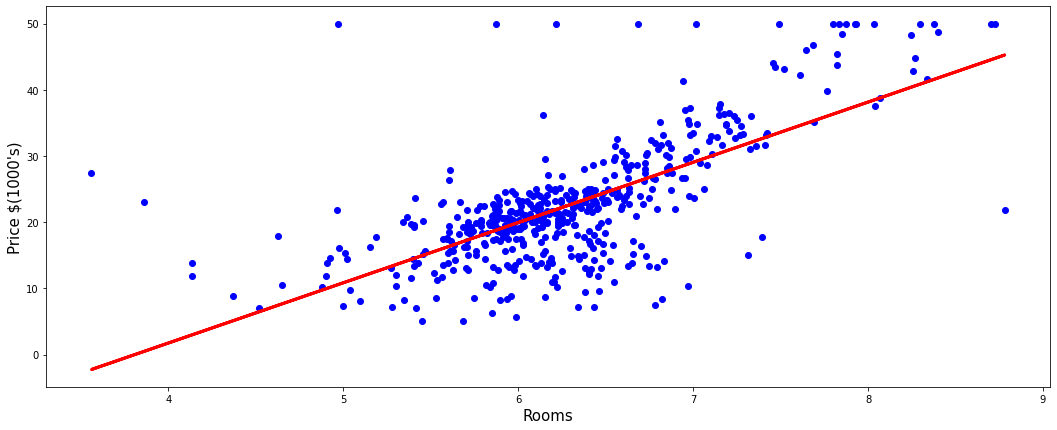

In [274]:
plt.figure(figsize = (18, 7))
plt.scatter(X_rooms, y, color = "blue")
plt.plot(X_rooms, yhat, color = "red", linewidth = 3)
plt.xlabel("Rooms", size = 15)
plt.ylabel("Price $(1000's)", size = 15)
plt.show()

### Linear Regression on all Features

In [275]:
X = df[df.columns.drop("Median values in $1000's")]
y = df["Median values in $1000's"]

In [276]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [277]:
# Model
lr = LinearRegression()
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)

In [278]:
pd.DataFrame({"Actual": y_test, "Predicted": yhat})[0:10]

,Actual,Predicted
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


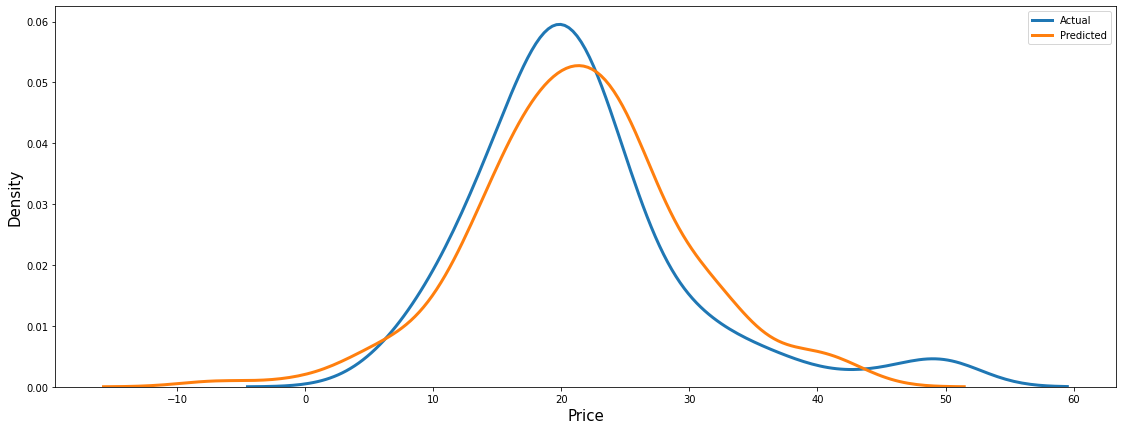

In [279]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3)
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3)
plt.xlabel("Price", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [280]:
r_squared = r2_score(y_test, yhat)
r_squared

0.711226005748492

### Cross Validation

In [281]:
X = df[df.columns.drop("Median values in $1000's")]
y = df["Median values in $1000's"]

In [282]:
lr = LinearRegression()
cv_results = cross_val_score(lr, X, y, cv = 5)
print("Cross Validation scores =", cv_results)

Cross Validation scores = [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [283]:
print("Average Cross Validation Score =", np.mean(cv_results))

Average Cross Validation Score = 0.3532759243958735


### Ridge Regression

In [284]:
X = df[df.columns.drop("Median values in $1000's")]
y = df["Median values in $1000's"]

In [285]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.3,
                                                   random_state = 42)

In [286]:
r = []
for n in range(0, 10):
    ridge = Ridge(alpha = n, normalize = True)
    ridge.fit(x_train, y_train)
    yhat = ridge.predict(x_test)
    score = ridge.score(x_test, y_test)
    r.append(score)
r

[0.7112260057484923,
 0.6241064474736233,
 0.5538279618769414,
 0.49911119613660304,
 0.45483533940037846,
 0.4178732557172299,
 0.38635104930737163,
 0.35905401228153655,
 0.33513898775981266,
 0.3139904647980929]

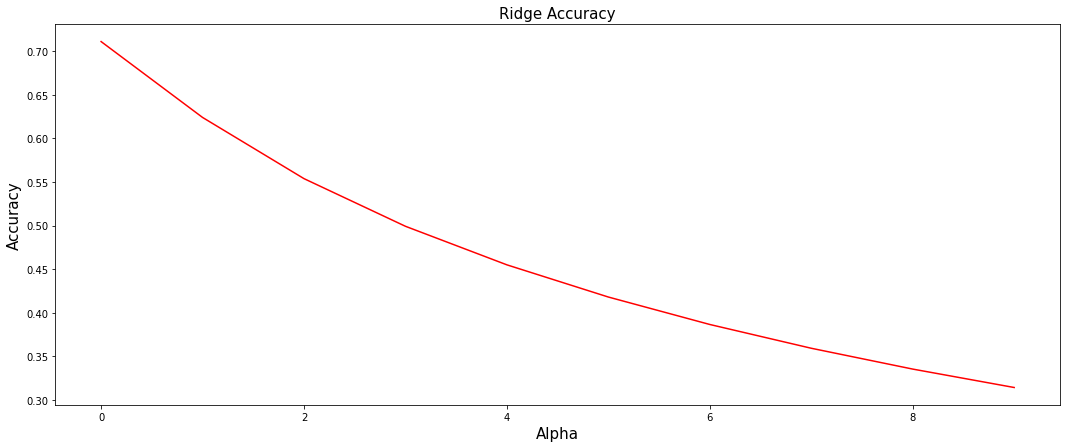

In [287]:
r_list = range(0, 10)
plt.figure(figsize = (18, 7))
plt.plot(r_list, r, color = "red")
plt.xlabel("Alpha", size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("Ridge Accuracy", size = 15)
plt.show()

**Use Alpha = 0.1**

In [288]:
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train, y_train)
y_ridge = ridge.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_ridge})[0:5]

,Actual,Predicted
173,23.6,27.970238
274,32.4,35.383077
491,13.6,16.826075
72,22.8,25.145152
452,16.1,18.748605


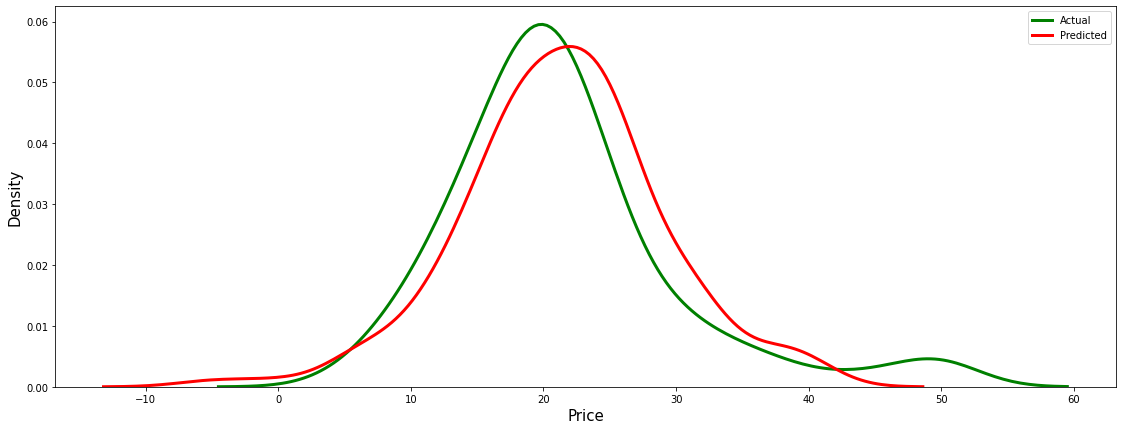

In [289]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "green")
sns.kdeplot(x = y_ridge, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Price", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [290]:
score = ridge.score(x_test, y_test)
print("Accuracy of Ridge =", score)

Accuracy of Ridge = 0.6996938275127313


**Regularization: Ridge**

In [291]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

for a in alpha_space:
    ridge = Ridge(alpha = a, normalize = True)
    ridge_cv_scores = cross_val_score(ridge, X, y, cv = 10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

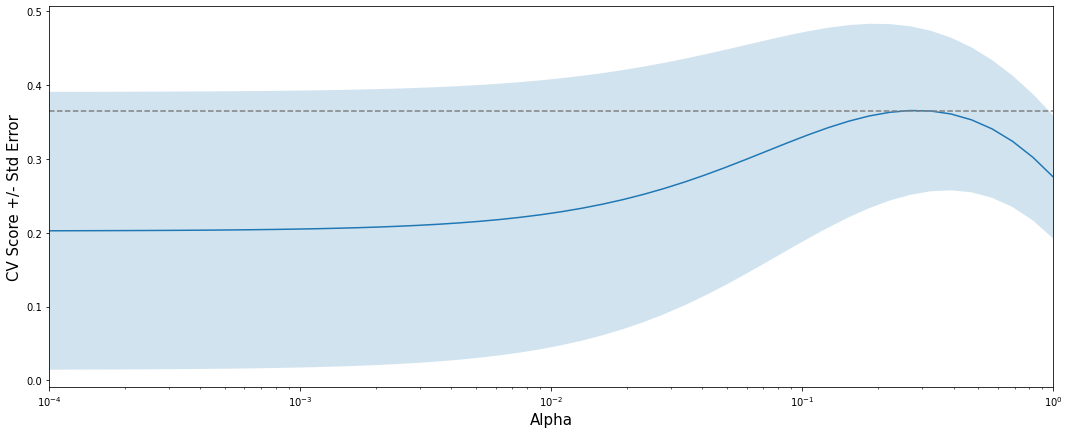

In [292]:
# Plot function
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure(figsize = (18, 7))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error', size = 15)
    ax.set_xlabel('Alpha', size = 15)
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
display_plot(ridge_scores, ridge_scores_std)

### Lasso Regression

In [293]:
X = df[df.columns.drop("Median values in $1000's")]
y = df["Median values in $1000's"]

In [294]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [295]:
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train, y_train)
yl = lasso.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": yl})[0:5]

,Actual,Predicted
173,23.6,25.463924
274,32.4,28.929234
491,13.6,18.615293
72,22.8,25.260416
452,16.1,19.975154


In [296]:
score = lasso.score(x_test, y_test)
score

0.5950229535328551

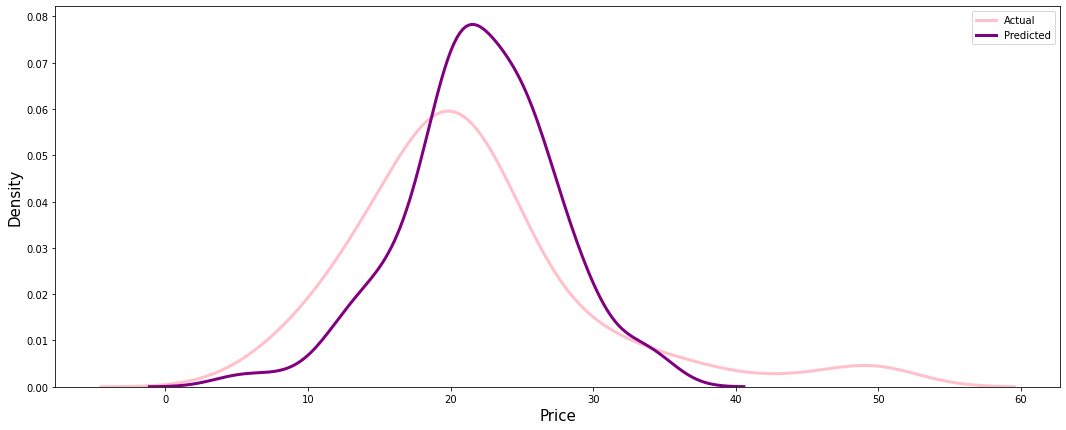

In [297]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(x = yl, label = "Predicted", linewidth = 3, color = "purple")
plt.xlabel("Price", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

**Lasso for feature selection**

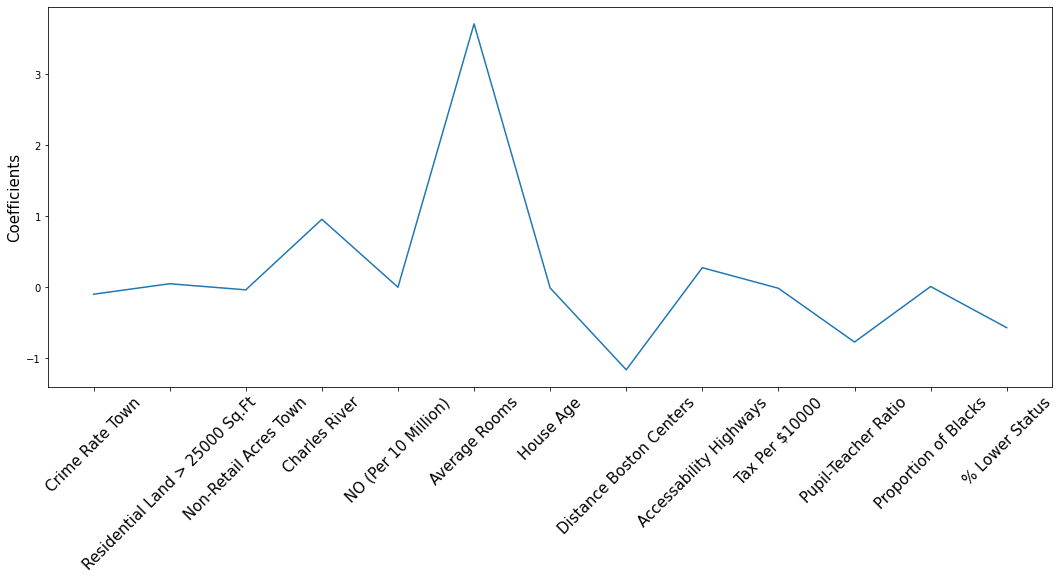

In [298]:
names = df.drop("Median values in $1000's", axis = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.figure(figsize = (18, 7))
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 45, size = 15)
plt.ylabel("Coefficients", size = 15)
plt.show()